In [50]:
import pandas as pd
import requests 
import datetime
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import math
from math import sqrt
import os
import scipy.stats as stats
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import pyarrow.feather as feather

In [58]:
# read file
read_df = feather.read_feather(r'/Users/xiaokangdong/Desktop/kaiko_tx_eth+btc_mar+apr_20200519.feather')

ArrowIOError: Failed to open local file: /Users/xiaokangdong/Desktop/kaiko_tx_eth+btc_mar+apr_20200519.feather , error: No such file or directory

In [54]:
# check datetime type, check NA
read_df.info()
##read_df["Datetime"]= pd.to_datetime(read_df["datetime"])
read_df.isna().sum()

# subset dataframe with ex including :( cb kk bf bs ib )
options = ['cb','kk','bf','bs','ib' ]
read_d = read_df[read_df['ex'].isin(options)]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7971448 entries, 0 to 7971447
Data columns (total 6 columns):
ex          category
symbol      category
datetime    datetime64[ns]
price       float64
amount      float64
Datetime    datetime64[ns]
dtypes: category(2), datetime64[ns](2), float64(2)
memory usage: 258.5 MB


In [55]:
# split datetime to date, time, hour, minute, second
read_d["date"] = read_df.datetime.dt.date
read_d["time"] = read_df.datetime.dt.time
read_d["hour"] = read_df.datetime.dt.hour
read_d["minute"] = read_df.datetime.dt.minute
read_d["second"] = read_df.datetime.dt.second

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,ex,symbol,datetime,price,amount,Datetime,date,time,hour,minute,second
0,cb,btcusd,2020-03-16 00:00:00.062,5346.86,0.001715,2020-03-16 00:00:00.062,2020-03-16,00:00:00.062000,0,0,0
1,cb,btcusd,2020-03-16 00:00:00.613,5345.33,0.035840,2020-03-16 00:00:00.613,2020-03-16,00:00:00.613000,0,0,0
2,cb,btcusd,2020-03-16 00:00:00.613,5344.31,0.037237,2020-03-16 00:00:00.613,2020-03-16,00:00:00.613000,0,0,0
3,cb,btcusd,2020-03-16 00:00:00.613,5344.05,0.300000,2020-03-16 00:00:00.613,2020-03-16,00:00:00.613000,0,0,0
4,cb,btcusd,2020-03-16 00:00:00.613,5344.04,0.354515,2020-03-16 00:00:00.613,2020-03-16,00:00:00.613000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7971443,ib,ethusd,2020-03-31 23:23:23.903,133.35,5.625000,2020-03-31 23:23:23.903,2020-03-31,23:23:23.903000,23,23,23
7971444,ib,ethusd,2020-03-31 23:25:36.343,133.30,7.203000,2020-03-31 23:25:36.343,2020-03-31,23:25:36.343000,23,25,36
7971445,ib,ethusd,2020-03-31 23:26:07.197,133.25,4.498600,2020-03-31 23:26:07.197,2020-03-31,23:26:07.197000,23,26,7
7971446,ib,ethusd,2020-03-31 23:38:15.640,133.40,0.390900,2020-03-31 23:38:15.640,2020-03-31,23:38:15.640000,23,38,15


In [164]:
# split into btc and eth dataframe
btc_d= read_d[read_d['symbol']== 'btcusd']
eth_d= read_d[read_d['symbol']== 'ethusd']


In [71]:
# for ETH, choose time window between 14:00-15:00 UTC
eth_d = eth_d.set_index("datetime")
eth_1415= eth_d.between_time('14:00', '15:00')

,ex,symbol,price,amount,Datetime,date,time,hour,minute,second
datetime,,,,,,,,,,
2020-03-20 14:00:04.126,cb,ethusd,140.58,10.000000,2020-03-20 14:00:04.126,2020-03-20,14:00:04.126000,14,0,4
2020-03-20 14:00:06.284,cb,ethusd,140.57,1.000000,2020-03-20 14:00:06.284,2020-03-20,14:00:06.284000,14,0,6
2020-03-20 14:00:09.077,cb,ethusd,140.45,4.493300,2020-03-20 14:00:09.077,2020-03-20,14:00:09.077000,14,0,9
2020-03-20 14:00:09.149,cb,ethusd,140.43,25.100000,2020-03-20 14:00:09.149,2020-03-20,14:00:09.149000,14,0,9
2020-03-20 14:00:09.149,cb,ethusd,140.37,3.835592,2020-03-20 14:00:09.149,2020-03-20,14:00:09.149000,14,0,9
...,...,...,...,...,...,...,...,...,...,...
2020-03-31 14:11:00.797,ib,ethusd,132.75,10.000000,2020-03-31 14:11:00.797,2020-03-31,14:11:00.797000,14,11,0
2020-03-31 14:11:00.800,ib,ethusd,132.75,1.889880,2020-03-31 14:11:00.800,2020-03-31,14:11:00.800000,14,11,0
2020-03-31 14:25:40.770,ib,ethusd,132.90,3.837000,2020-03-31 14:25:40.770,2020-03-31,14:25:40.770000,14,25,40


In [161]:
# using single asset method, calculate real time (median price of 5 ex) and in turn hourly index (TWAP)
eth= eth_1415.sort_index()
e = eth.groupby(['date','minute'])['price'].median().unstack(1)
epic= e.transpose().mean()


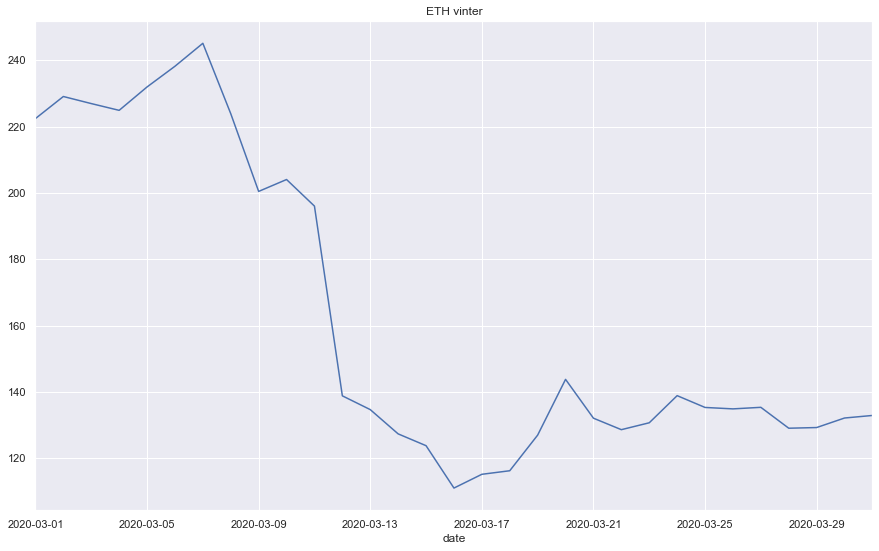

In [162]:
# line chart for ETH using vinter single asset method
axs,fig = plt.subplots(figsize = (15,9))
plt.title("ETH vinter")
epic.plot()

In [165]:
# for BTC, choose time window between 14:00-15:00 UTC
btc_d = btc_d.set_index("datetime")
btc_1415= btc_d.between_time('14:00', '15:00')
btc= btc_1415.sort_index()
b = btc.groupby(['date','minute'])['price'].median().unstack(1)
bpic= b.transpose().mean()
bpic

date
2020-03-01    8594.210167
2020-03-02    8844.897750
2020-03-03    8756.411167
2020-03-04    8755.186250
2020-03-05    9073.352333
2020-03-06    9084.883000
2020-03-07    9111.777083
2020-03-08    8640.118833
2020-03-09    7761.544583
2020-03-10    8082.311667
2020-03-11    7838.491333
2020-03-12    6041.618583
2020-03-13    5720.082750
2020-03-14    5361.069500
2020-03-15    5292.867833
2020-03-16    4927.333833
2020-03-17    5202.631583
2020-03-18    5361.455417
2020-03-19    5848.543333
2020-03-20    6654.856333
2020-03-21    6166.059000
2020-03-22    6051.415917
2020-03-23    6260.962750
2020-03-24    6708.083583
2020-03-25    6613.913667
2020-03-26    6625.499417
2020-03-27    6617.208250
2020-03-28    6249.547583
2020-03-29    6133.846750
2020-03-30    6328.807417
2020-03-31    6466.974000
dtype: float64

In [167]:
bpic.to_csv('BTC.csv', sep='\t', encoding='utf-8', index= True)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


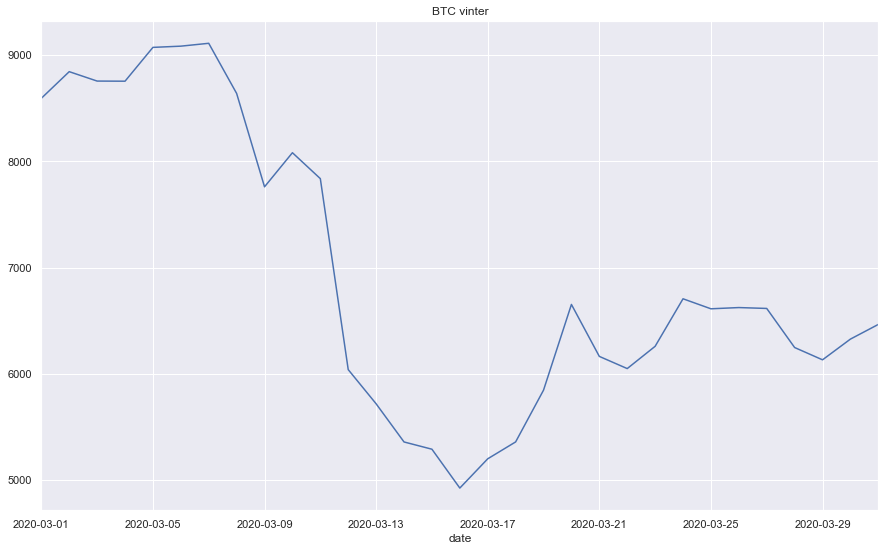

In [159]:
# line chart for BTC using vinter single asset method
axs,fig = plt.subplots(figsize = (15,9))
plt.title("BTC vinter")
bpic.plot()